# import

In [1]:
import numpy as np 
import pandas as pd 
import ast

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
import os


In [2]:
RANDOM_SEED = 42


In [3]:
!pip freeze > requirements.txt

# DATA LOADING

In [4]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# объединяем трейн и тест в один датасет:
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, поэтому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
25888,id_7909,London,"['British', 'Gluten Free Options']",7918.0,$$ - $$$,193.0,"[['Very Good Afternoon Tea', 'Great lounge'], ...",/Restaurant_Review-g186338-d3477545-Reviews-Th...,d3477545,1,3.5
7693,id_7693,Milan,['Italian'],4289.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187849-d6776682-Reviews-Fa...,d6776682,0,0.0
23731,id_4788,Milan,NaN,4791.0,NaN,10.0,"[['Bad food with correct service'], ['10/10/20...",/Restaurant_Review-g187849-d11666691-Reviews-P...,d11666691,1,3.5
8641,id_8641,Copenhagen,"['European', 'Scandinavian', 'Danish']",1923.0,$$ - $$$,169.0,"[['Skip', 'Dinner on firdt night back in Copen...",/Restaurant_Review-g189541-d2153805-Reviews-Ci...,d2153805,0,0.0
38792,id_321,Lyon,['French'],322.0,$$ - $$$,86.0,"[['Relaxing atmosphere'], ['12/02/2017']]",/Restaurant_Review-g187265-d11960579-Reviews-C...,d11960579,1,4.0


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

# Cleaning and Prepping Data


## 1. Обработка NAN 


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Для признаков с пропусками:
1. "Price Range"
    
    > создадим Dummy-признаки, один из которых будет признаком отсутствия признака ("unknown price range")
    
   
2. "Number of Reviews"  
    > создадим признак "Number of Reviews_isNAN", 
    
    > пропуски заполним средним

3. "Reviews"           
    > создадим признак  "Reviews_isNAN", 
    
    > пропуски заполним 0
    
    > создадим признак "частота отзывов" - разница по времени между последними отзывами
    
    > создадим признак "давность последнего отзыва" 
    
    > создадим признак "позитивность отзывов" - количество позитивных слов
    
    > создадим признак "негативность отзывов" - количество негативных слов 
    
4. "Cuisine Style"     
    > пропуски заполним значением "no cuisine"
    
    > создадим Dummy-признаки, один из которых будет признаком отсутствия признака  ("no cuisine")


### 2. Обработка признаков
Посмотрим на каждый признак по очереди.

In [14]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

#### 1. "Restaurant_id"

In [15]:
data["Restaurant_id"].nunique()

13094

признак повторяется, похоже, что у юнитов сетевых ресторанов один id. 
можно добавить новый признак "сетевой ресторан"

#### 2. "City"

In [16]:
data["City"].unique()

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

в датасете перечислены города Западной Европы, не всегда по одному на страну и не все столицы

на основании этого признака добавим: 

    1. признак столицы
    2. национальную кухню соответствующей страны
    3. туристов
    

используем для:

    1. вычисления относительного ранкинга по городу 
    2. группировки при визуализации
    
и после всех преобразований сделаем из колонки "City" dummy признак

#### 3. "Cuisine Style"

преобразуем в список
    
    1. добавим признак "количество кухонь в ресторане", пропуски заполним медианой по городу
    2. добавим признак "наличие локальной кухни в ресторане" (1 или 0)
    3. добавим признак количества кухонь в ресторане из топ-списка на основании подсчета Ranking
    4. преобразуем в dummy-переменные, одной из которых будем считать "no cuisine" (NaN)


In [17]:
def get_cuisine_list(st_source):
    # split str to list
    if pd.isna(st_source):
        
        return "no cuisine" #st_source
    
    lst_result = ast.literal_eval(st_source)
    return lst_result

data["Cuisine Style"].apply(get_cuisine_list).explode().unique()

array(['Bar', 'Pub', 'European', 'Scandinavian', 'Gluten Free Options',
       'Vegetarian Friendly', 'Vegan Options', 'Italian', 'Mediterranean',
       'Seafood', 'French', 'Cafe', 'Fast Food', 'Portuguese',
       'no cuisine', 'Greek', 'Czech', 'Eastern European',
       'Central European', 'Pizza', 'British', 'Spanish', 'Norwegian',
       'African', 'Moroccan', 'Middle Eastern', 'Halal', 'Indian', 'Thai',
       'Dutch', 'Welsh', 'American', 'Steakhouse', 'Soups', 'Scottish',
       'Fusion', 'Street Food', 'Hungarian', 'Asian', 'Wine Bar',
       'Barbecue', 'Central American', 'Peruvian', 'South American',
       'Irish', 'Polish', 'Vietnamese', 'Lebanese', 'Turkish', 'Healthy',
       'Japanese', 'Sushi', 'Austrian', 'Chinese', 'Danish',
       'International', 'Gastropub', 'Korean', 'German', 'Contemporary',
       'Arabic', 'Diner', 'Swiss', 'Swedish', 'Persian', 'Australian',
       'Grill', 'Mexican', 'Latin', 'Belgian', 'Argentinean', 'Tunisian',
       'Russian', 'Nepali

In [18]:
data["Cuisine Style"].apply(get_cuisine_list).explode().nunique()

126

#### 4. "Ranking"

упростим анализ с помощью преобразования абсолютногго значения в относительное (облегченный вариант нормализации) по городу

....

все-таки "тяжелый" минимакс лучше...

#### 5. "Price Range"

In [19]:
data['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

как номинальный признак дает меньшее отклонение, потому преобразуем в dummy

#### 6. "Number of Reviews"           
заполним пропуски нулями

#### 7. "Reviews"

   

In [20]:
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

#### 8, 9. "URL_TA", "ID_TA"  

In [21]:
# "CUISINE STYLE" *** "CUISINE STYLE" *** "CUISINE STYLE" 

def get_cuisine_list(st_source):
    # split str to list
    if pd.isna(st_source):
        return "no cuisine"
    
    lst_result = ast.literal_eval(st_source)
    return lst_result


data["Cuisine Style_list"] = data["Cuisine Style"].apply(get_cuisine_list)

# count cuisine styles per restaurant:
data["Cuisine number"] = data["Cuisine Style_list"].dropna().apply(lambda x: len(x))
data["Cuisine number"].fillna(data.groupby('City')["Cuisine number"].transform('median'), inplace=True)


# check whether the restaurant has native cuisine of the country:

def source_in_target(source, target):
    if source in target:
        return 1
    else:
        return 0

d_native_cuisines = {
        "Paris": "French", 'Stockholm': "Swedish",'London': "British", "Berlin": "German", 'Munich': "German", "Oporto": "Portuguese", "Milan": "Italian", "Bratislava": "European", "Vienna": "Austrian",
        "Rome": "Italian",  "Barcelona": "Spanish", "Madrid": "Spanish", "Dublin": "Irish", "Brussels": "Belgian", "Zurich": "Swiss", "Warsaw": "Polish", "Budapest": "Hungarian", "Copenhagen": "Danish",
        "Amsterdam": "Dutch", "Lyon": "French", "Hamburg": "German", "Lisbon": "Portuguese", "Prague": "Czech", "Oslo": "Norwegian", "Helsinki": "Scandinavian", "Edinburgh": "Scottish", "Geneva": "Swiss",
        "Ljubljana": "Slovenian", "Athens": "Greek", "Luxembourg": "French", "Krakow": "Polish" }
data["native_cuisine_name"] = data["City"].map(d_native_cuisines)
data["native_cuisine"] = data.dropna(subset=["Cuisine Style_list"]).apply(lambda x: source_in_target(x["native_cuisine_name"], x["Cuisine Style_list"]), axis=1)
data["native_cuisine"].fillna(0, inplace=True)


# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> INSERTED FROM BASELINE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# это блок расчета влияния типа кухни на рейтинг. Создаем признак с подсчетом количества кухонь в ресторане
# из топ-списка на основании подсчета Ranking

def top_cuisine_count(cuisines, short_list):
        result = 0
        for item in cuisines.split(','):
            if item.strip(" '[]'") in short_list:
                result += 1
        return result


cuisine_list = set()
for row in data['Cuisine Style'].fillna('No Cuisine'): # в этом цикле формируем set уникальных кухонь
    for name in row.split(','):
        cuisine_list.add(name.strip(" '[]'"))

cuisine_list_count = pd.DataFrame(cuisine_list, columns=['cuisine'])
cuisine_list_count['Ranking'] = 0

cuisine_list_count.set_index('cuisine', inplace=True) # в этом двойном цикле считаем суммой Ranking по уникальным кухням
data['Cuisine Style'].fillna('No Cuisine', inplace=True)
for row in range(len(data)):
    for name in data.loc[row]['Cuisine Style'].split(','):
        name = name.strip(" '[]'")
        cuisine_list_count.loc[name, 'Ranking'] += data.loc[row, 'Ranking']

top_cuisine = np.percentile(cuisine_list_count['Ranking'], 90) # вычленяем 90% персентиль по Ranking
top_list = list(cuisine_list_count[cuisine_list_count['Ranking'] >= top_cuisine].index)
data['top_cuisine_count'] = data['Cuisine Style'].apply(lambda row: top_cuisine_count(row, top_list))

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< INSERTED FROM BASELINE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# getting dummies cuisines:
df_cuisines_exploded=data["Cuisine Style_list"].explode().to_frame()
df_dum_cuisines = pd.get_dummies(df_cuisines_exploded["Cuisine Style_list"])
df_dum_cuisines= df_dum_cuisines.reset_index().groupby("index").sum()
data = pd.concat([data, df_dum_cuisines], axis=1)



# "RANKING" *** "RANKING" *** "RANKING"
data_maxranking = round(data.groupby("City")["Ranking"].max()).reset_index()
data_maxranking.columns = ["City","Ranking_max"]
data = pd.merge(data, data_maxranking, on="City")
data["relative_ranking"] = data["Ranking"]/data["Ranking_max"]


# "NUMBER OF REVIEWS" *** "NUMBER OF REVIEWS" *** "NUMBER OF REVIEWS":

data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number of Reviews'].fillna(0, inplace=True) 


# REVIEWS *** REVIEWS *** REVIEWS:

# REVIEWS - words:
# количество положительных и негативных слов
def good_response(row):
    words_count = 0
    good_words_list = ['good', 'wonderful', 'great', 'best', 'excellent', 'perfect', 'awesome', 'nice', 'fantastic',
                        'delicious', 'tasty', 'amazing', 'fine', 'wow', 'favorite', 'fabulous', 'lovely', 'cosy',
                           'decent', 'beautiful', 'surpris', 'happy', "friendly", "clean", "heavenly", "fast", "efficient",
                       "relaxed", "fab", "unique", "liked", "brilliant", "fresh", "relaxing",
                      "enjoy", "enjoying", "top", "class", "healthy", "delightful",
                      "fabulous", "super", "superb", "cozy", "affordable", "charming",
                       "splendiferous", "splended", "authentic", "best ever", "outstanding", 
                       "yummy", "cheerful", "cute", "favourite","modern", "sensational", "chic",
                      "ideal", "love", "kind", "glad", "romantic", "quiet", "incredible", "treasure", "great view", "fun", "try",
                      "family", "gem", "pure"]

    for good in good_words_list:
        words_count += row.split('], [')[0].lower().count(good)
    return words_count

def negative_response(row):
    words_count = 0
    negative_words_list = ["unhappy", "untasty", "horrible", "unfrendly", 
                           "wasting", "slow", "boring", "terrible", "rude", 
                           "dump", "dirty", "junk", "cold", "lack", "lacks", "ugly", "dark",
                          "bad", "but", "shameful", "shame", "disappointing", "disappointed", 
                           "overpriced", "watery", "nothing special", "never", "small",
                           "skimpy", "busy", "not perfect", "crazy", "wait", 
                           "do not", "don't", "so-so", "noisy", "unfair", "rubbish"]

    for negative in negative_words_list:
        words_count += row.split('], [')[0].lower().count(negative)
    return words_count

data['good_words_count'] = data.Reviews.apply(lambda row: good_response(str(row).split('], [')[0]))
data['negative_words_count'] = data.Reviews.apply(lambda row: negative_response(str(row).split('], [')[0]))

# REVIEWS - dates:

def data_convert(string):
        try:
            return pd.to_datetime(string.split(',')[-2].strip(r" ']["))
        except:
            return pd.to_datetime(string.split(',')[-1].strip(r" ']["))

# количество дней между отзывами. Если нет отзывов потом заполним соедним количеством дней
def data_diff(row):
        try:
            return abs(row[1] - row[0]).days
        except:
            return None    
    
data['Review_date_last'] = data['Reviews'].apply(lambda name: pd.to_datetime(str(name).split(",")[-1].strip(r" '][")))
data['Review_date_first'] = data['Reviews'].apply(lambda name: data_convert(str(name)))
data['days'] = data[['Review_date_last','Review_date_first']].apply(lambda row: data_diff(row), axis=1)
data['days'] = data['days'].fillna(data['days'].mean())

# количество дней c последнего отзыва до сегодняшнего дня
data['days_to_today'] = data['Review_date_last'].apply(lambda days: (pd.to_datetime('today') - days).days)
data['days_to_today'].fillna(data.groupby('City')['days_to_today'].transform('median'), inplace=True)

# "PRICE RANGE" *** "PRICE RANGE" *** "PRICE RANGE":
# adding dummies for Price Range:
data["Price Range"].fillna("unknown price range", inplace=True)
price_dum = pd.get_dummies(data["Price Range"])
data = pd.concat([data, price_dum], axis=1)



# "CITIES" *** "CITIES" *** "CITIES":
# признак столицы государства
capital_mark = {
        'Paris': 1, 'Stockholm': 1,'London': 1, 'Berlin': 1, 'Munich': 0, 'Oporto': 0, 'Milan': 0, 'Bratislava': 1, 'Vienna': 1,
        'Rome': 1,  'Barcelona': 0, 'Madrid': 1, 'Dublin': 1, 'Brussels': 1, 'Zurich': 0, 'Warsaw': 1, 'Budapest': 1, 'Copenhagen': 1,
        'Amsterdam': 1, 'Lyon': 0, 'Hamburg': 0, 'Lisbon': 1, 'Prague': 1, 'Oslo': 1, 'Helsinki': 1, 'Edinburgh': 1, 'Geneva': 0,
        'Ljubljana': 1, 'Athens': 1, 'Luxembourg': 1, 'Krakow': 0 }

data['capital_mark'] = data['City'].map(capital_mark)
# туристы    
turists_count = {'Paris': 17.56, 'Stockholm': 2.60,'London': 19.23, 'Berlin': 5.96, 'Munich': 4.06, 'Oporto': 2.34, 'Milan': 6.48, 'Bratislava': 1, 'Vienna': 6.41,
    'Rome': 10.07,  'Barcelona': 6.71, 'Madrid': 1, 'Dublin': 5.21, 'Brussels': 1, 'Zurich': 2.24, 'Warsaw': 2.73, 'Budapest': 3.82, 'Copenhagen': 3.07,
    'Amsterdam': 8.35, 'Lyon': 0, 'Hamburg': 1.45, 'Lisbon': 3.54, 'Prague': 8.95, 'Oslo': 0.7, 'Helsinki': 1, 'Edinburgh': 1.66, 'Geneva': 1,
    'Ljubljana': 1, 'Athens': 5.73, 'Luxembourg': 1, 'Krakow': 2.85}

data['turists_count'] = data['City'].map(turists_count)
# создаем dummies Cities:
data = pd.get_dummies(data, columns=['City'])#, dummy_na=True)

In [22]:
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,id_5,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,id_15,['French'],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,id_31,No Cuisine,3156.0,unknown price range,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,id_34,['French'],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,...,0,0,0,1,0,0,0,0,0,0


# EDA 

### Посмотрим распределение признака

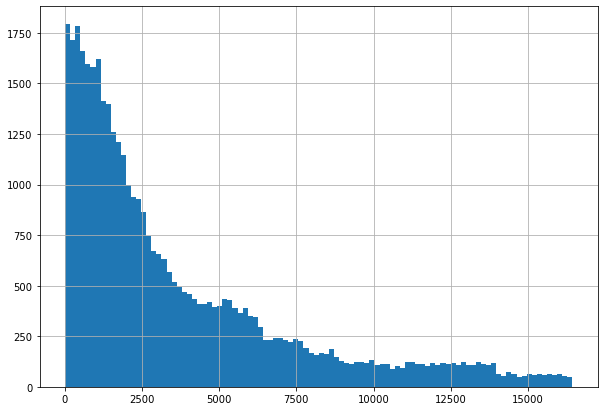

In [23]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

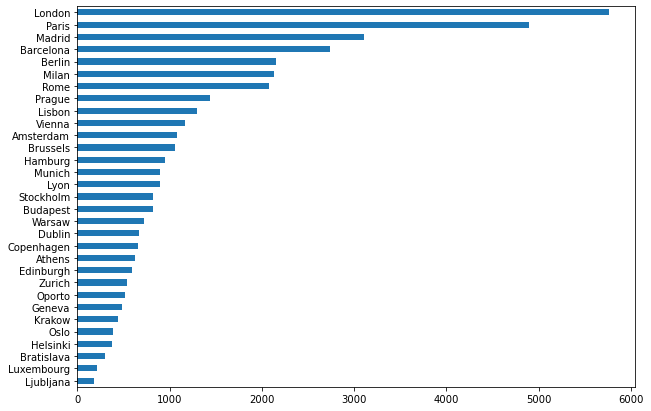

In [24]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

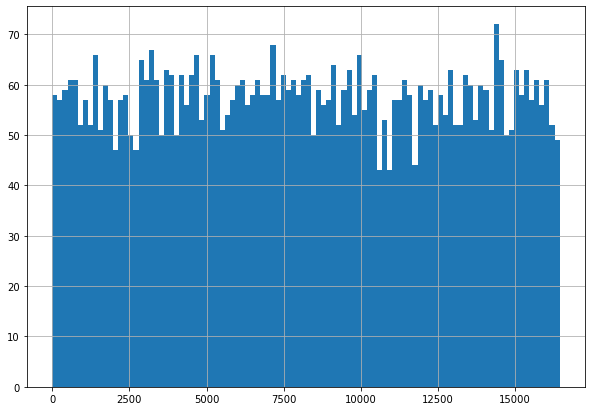

In [25]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

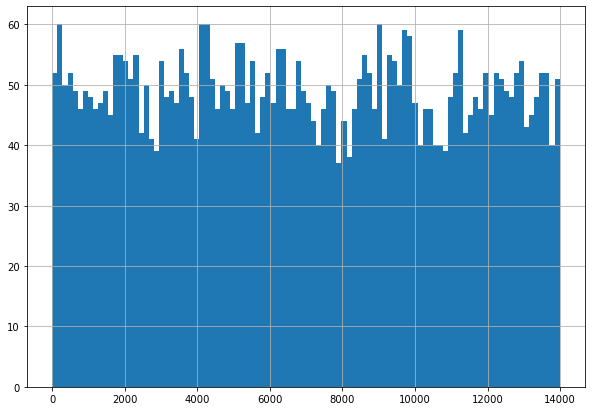

In [26]:
df_train['Ranking'][df_train['City'] =='Paris'].hist(bins=100)

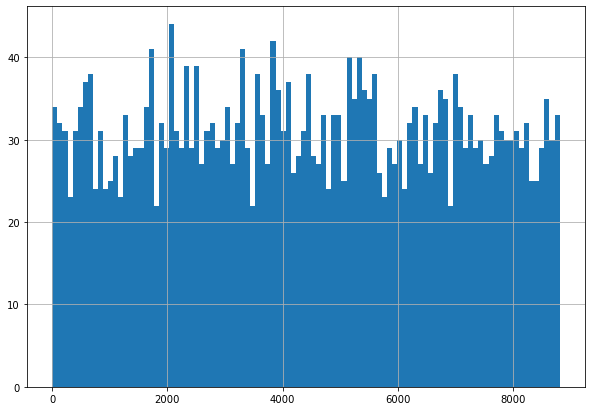

In [27]:
df_train['Ranking'][df_train['City'] =='Madrid'].hist(bins=100)

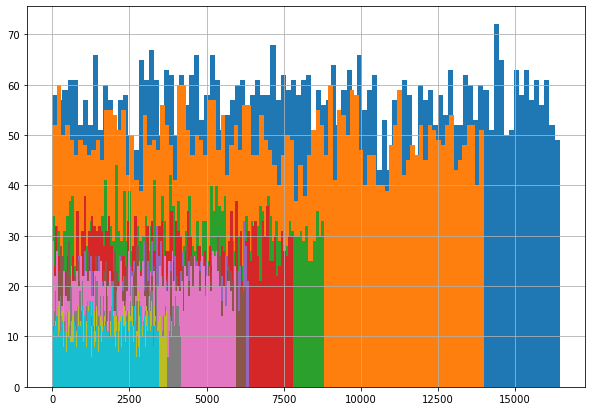

In [28]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.



### Посмотрим распределение целевой переменной

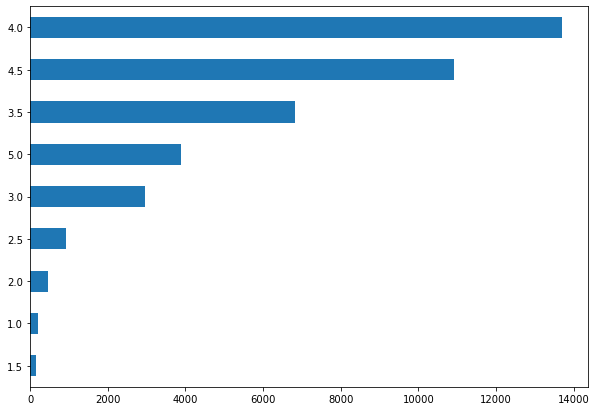

In [29]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

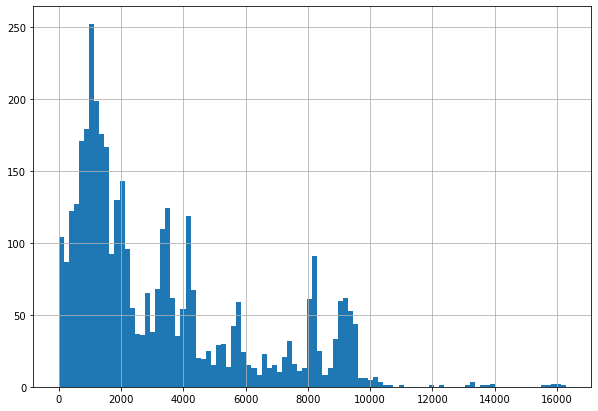

In [30]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

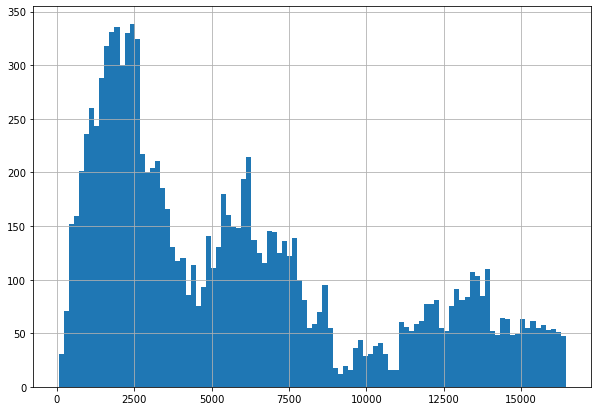

In [31]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [32]:
# plt.rcParams['figure.figsize'] = (15,10)
# sns.heatmap(data.drop(['sample'], axis=1).corr(),)
data.drop(['sample'], axis=1).corr()

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Cuisine number,native_cuisine,top_cuisine_count,Afghani,African,Albanian,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
Ranking,1.000000,-0.223198,-0.109897,0.094831,-0.005489,-0.129575,-0.237733,0.000504,0.002307,-0.008126,...,-0.094920,-0.089770,-0.083496,0.330099,-0.082766,-0.043811,-0.095269,-0.090999,-0.096816,-0.091422
Number of Reviews,-0.223198,1.000000,0.011006,-0.106457,-0.005661,0.223297,0.317303,-0.002878,-0.005413,-0.003813,...,-0.023834,0.003451,-0.007289,-0.006570,-0.004370,0.134553,-0.023958,-0.025635,-0.027038,-0.019863
Rating,-0.109897,0.011006,1.000000,-0.000631,0.006641,0.012707,0.027668,0.002146,0.005669,0.008757,...,-0.003420,0.009654,-0.007143,-0.007362,0.001123,0.027527,-0.010417,0.010188,0.001580,-0.001481
Number_of_Reviews_isNAN,0.094831,-0.106457,-0.000631,1.000000,0.117964,-0.094890,-0.144664,-0.002561,0.003490,0.009613,...,0.005856,0.001388,-0.007674,-0.024931,0.040523,-0.033078,0.008553,0.012519,0.022316,-0.002699
Cuisine number,-0.005489,-0.005661,0.006641,0.117964,1.000000,-0.272123,0.073133,-0.003434,-0.028468,-0.003673,...,0.015434,0.003873,0.006559,-0.072341,-0.019693,-0.028782,0.021948,0.028037,0.013527,0.012863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Rome,-0.043811,0.134553,0.027527,-0.033078,-0.028782,0.166988,0.119112,-0.001547,-0.007269,-0.002956,...,-0.035775,-0.026651,-0.023200,-0.087173,-0.045366,1.000000,-0.033941,-0.040284,-0.032082,-0.027541
City_Stockholm,-0.095269,-0.023958,-0.010417,0.008553,0.021948,-0.042527,-0.029749,-0.003376,-0.002239,-0.001837,...,-0.022235,-0.016565,-0.014420,-0.054182,-0.028197,-0.033941,1.000000,-0.025038,-0.019941,-0.017118
City_Vienna,-0.090999,-0.025635,0.010188,0.012519,0.028037,-0.019100,-0.016930,-0.004007,-0.004951,-0.002181,...,-0.026391,-0.019661,-0.017114,-0.064308,-0.033467,-0.040284,-0.025038,1.000000,-0.023667,-0.020317
City_Warsaw,-0.096816,-0.027038,0.001580,0.022316,0.013527,-0.029458,-0.023635,-0.003191,-0.006153,-0.001737,...,-0.021018,-0.015658,-0.013630,-0.051215,-0.026653,-0.032082,-0.019941,-0.023667,1.000000,-0.016181


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  sample             40000 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


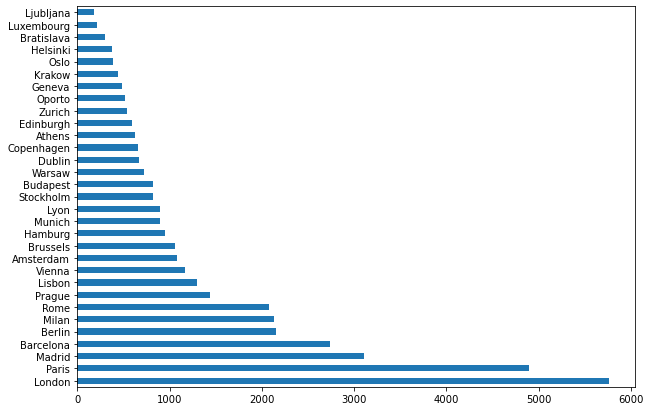

In [34]:
# дорогие рестораны по городам
df_train[df_train["Price Range"].astype(str).str.contains("$$$$")]["City"].value_counts().plot(kind='barh')


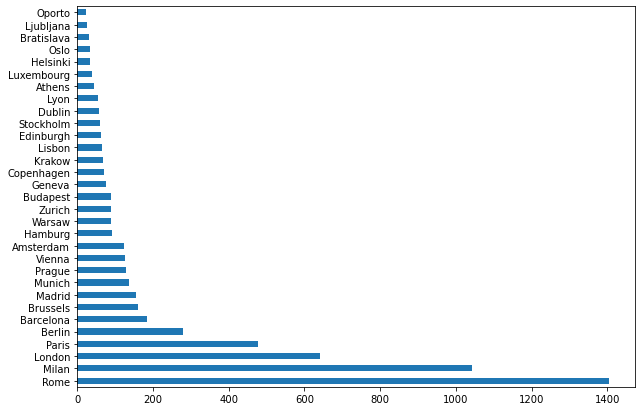

In [35]:
df_train[df_train["Cuisine Style"].astype(str).str.contains("Italian")]["City"].value_counts().plot(kind='barh')


Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

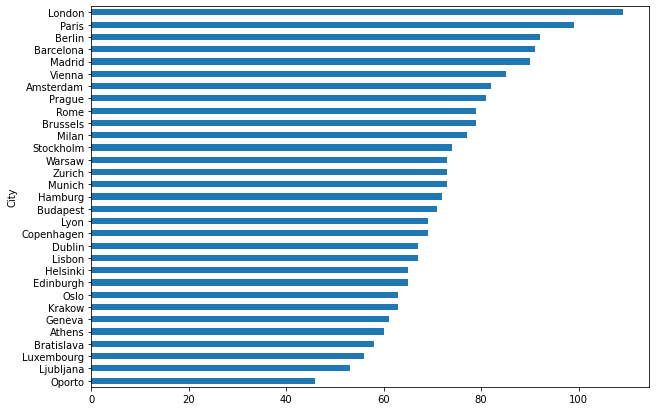

In [36]:
# в каком городе кухня ресторанов более разнообразна
dt_cuisine_variety=df_train[["City","Cuisine Style"]].dropna()
dt_cuisine_variety["Cuisine Style"]= dt_cuisine_variety["Cuisine Style"].apply(lambda x: ast.literal_eval(x))
dt_cuisine_variety=dt_cuisine_variety.explode("Cuisine Style").groupby("City").nunique()
dt_cuisine_variety=dt_cuisine_variety.drop("City", axis=1)
dt_cuisine_variety.sort_values(by=["Cuisine Style"], ascending=True, inplace=True)

dt_cuisine_variety["Cuisine Style"].plot(kind='barh')


In [37]:


dt_cuisine_variety.reset_index()

d_cuisine_variety1 = dt_cuisine_variety.to_dict()['Cuisine Style']
d_cuisine_variety1


{'Oporto': 46,
 'Ljubljana': 53,
 'Luxembourg': 56,
 'Bratislava': 58,
 'Athens': 60,
 'Geneva': 61,
 'Krakow': 63,
 'Oslo': 63,
 'Edinburgh': 65,
 'Helsinki': 65,
 'Lisbon': 67,
 'Dublin': 67,
 'Copenhagen': 69,
 'Lyon': 69,
 'Budapest': 71,
 'Hamburg': 72,
 'Munich': 73,
 'Zurich': 73,
 'Warsaw': 73,
 'Stockholm': 74,
 'Milan': 77,
 'Brussels': 79,
 'Rome': 79,
 'Prague': 81,
 'Amsterdam': 82,
 'Vienna': 85,
 'Madrid': 90,
 'Barcelona': 91,
 'Berlin': 92,
 'Paris': 99,
 'London': 109}

In [38]:
# резюмируем в функцию:

def cuisine_variety(df_source):

    # дает карту соответствия {город : количество кухонь}
    dt_cuisine_variety=df_source[["City","Cuisine Style"]].dropna()
    dt_cuisine_variety["Cuisine Style"]= dt_cuisine_variety["Cuisine Style"].apply(lambda x: ast.literal_eval(x))
    dt_cuisine_variety=dt_cuisine_variety.explode("Cuisine Style").groupby("City").nunique()
    dt_cuisine_variety=dt_cuisine_variety.drop("City", axis=1)
    dt_cuisine_variety.sort_values(by=["Cuisine Style"], ascending=True, inplace=True)
    dt_cuisine_variety.reset_index()

    d_cuisine_variety = dt_cuisine_variety.to_dict()['Cuisine Style']

    return d_cuisine_variety

In [39]:
cuisine_variety(df_train)

{'Oporto': 46,
 'Ljubljana': 53,
 'Luxembourg': 56,
 'Bratislava': 58,
 'Athens': 60,
 'Geneva': 61,
 'Krakow': 63,
 'Oslo': 63,
 'Edinburgh': 65,
 'Helsinki': 65,
 'Lisbon': 67,
 'Dublin': 67,
 'Copenhagen': 69,
 'Lyon': 69,
 'Budapest': 71,
 'Hamburg': 72,
 'Munich': 73,
 'Zurich': 73,
 'Warsaw': 73,
 'Stockholm': 74,
 'Milan': 77,
 'Brussels': 79,
 'Rome': 79,
 'Prague': 81,
 'Amsterdam': 82,
 'Vienna': 85,
 'Madrid': 90,
 'Barcelona': 91,
 'Berlin': 92,
 'Paris': 99,
 'London': 109}

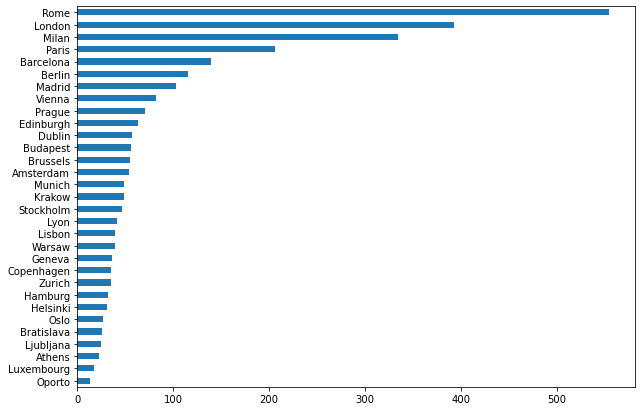

In [40]:
# Пицца (включена в меню) по городам:
df_train[df_train["Cuisine Style"].astype(str).str.contains("Pizza")]["City"].value_counts(ascending=True).plot(kind='barh')


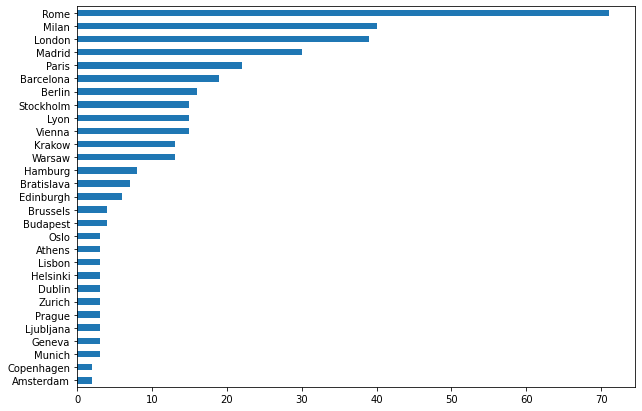

In [41]:
# Пиццерии по городам:
df_train[df_train["Cuisine Style"]=="['Pizza']"]["City"].value_counts(ascending=True).plot(kind='barh')


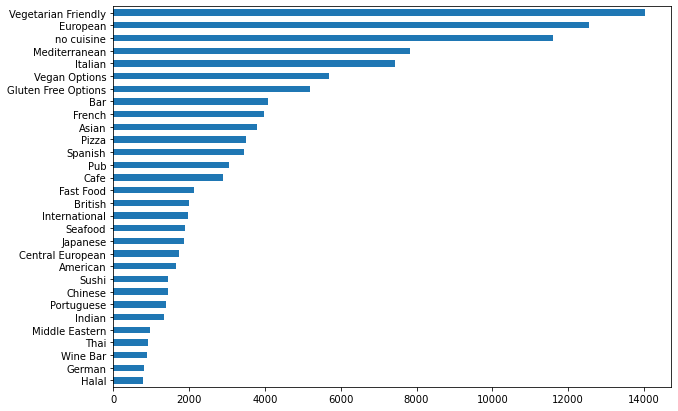

In [42]:
data["Cuisine Style_list"].explode().value_counts(ascending=True).tail(30).plot(kind='barh')

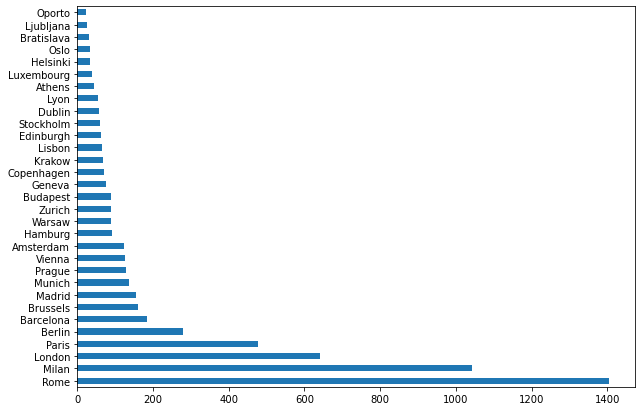

In [43]:
# Французская кухня (включена в меню) по городам:
df_train[df_train["Cuisine Style"].astype(str).str.contains("Italian")]["City"].value_counts().plot(kind='barh')


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [44]:
# на всякий случай, заново подгружаем данные
import pandas as pd
import numpy as np
import ast

pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # инструмент для создания и обучения модели
from sklearn import metrics


df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')

df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
#data = df_train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [45]:
def preproc_data(df_input):
    
    df = df_input.copy()
    # убираем не нужные для модели признаки
    df.drop(['Restaurant_id','ID_TA', 'URL_TA'], axis = 1, inplace=True)
   

    def good_response(row):
    # функция для подсчета положительных отзывов. 
        words_count = 0
        good_words_list = ['good', 'wonderful', 'great', 'best', 'excellent', 'perfect', 'awesome', 'nice', 'fantastic',
                        'delicious', 'tasty', 'amazing', 'fine', 'wow', 'favorite', 'fabulous', 'lovely', 'cosy',
                           'decent', 'beautiful', 'surpris', 'happy', "friendly", "clean", "heavenly", "fast", "efficient",
                       "relaxed", "fab", "unique", "liked", "brilliant", "fresh", "relaxing",
                      "enjoy", "enjoying", "top", "class", "healthy", "delightful",
                      "fabulous", "super", "superb", "cozy", "affordable", "charming",
                       "splendiferous", "splended", "authentic", "best ever", "outstanding", 
                       "yummy", "cheerful", "cute", "favourite","modern", "sensational", "chic",
                      "ideal", "love", "kind", "glad", "romantic", "quiet", "incredible", "treasure", "great view", "fun", "try",
                      "family", "gem", "pure"]

        for good in good_words_list:
            words_count += row.split('], [')[0].lower().count(good)
        return words_count

    def negative_response(row):
        words_count = 0
        negative_words_list = ["unhappy", "untasty", "horrible", "unfrendly", 
                           "wasting", "slow", "boring", "terrible", "rude", 
                           "dump", "dirty", "junk", "cold", "lack", "lacks", "ugly", "dark",
                          "bad", "but", "shameful", "shame", "disappointing", "disappointed", 
                           "overpriced", "watery", "nothing special", "never", "small",
                           "skimpy", "busy", "not perfect", "crazy", "wait", 
                           "do not", "don't", "so-so", "noisy", "unfair", "rubbish"]

        for negative in negative_words_list:
            words_count += row.split('], [')[0].lower().count(negative)
        return words_count

    

    # вычленяем первую дату отзыва. По некторым ресторанам только один отзыв
    def data_convert(string):
        try:
            return pd.to_datetime(string.split(',')[-2].strip(r" ']["))
        except:
            return pd.to_datetime(string.split(',')[-1].strip(r" ']["))

    # расчитываем дней между отзывами. Если нет отзывов потом заполним соедним количеством дней
    def data_diff(row):
        try:
            return abs(row[1] - row[0]).days
        except:
            return None

    # функция, при помощи которой будем подсчитывать количество кухонь из топ-списка
    def top_cuisine_count(cuisines, short_list):
        result = 0
        for item in cuisines.split(','):
            if item.strip(" '[]'") in short_list:
                result += 1
        return result
    
    def get_cuisine_list(st_source):
        # split str to list
        if pd.isna(st_source):
            return "no cuisine"

        lst_result = ast.literal_eval(st_source)
        return lst_result
    
    def source_in_target(source, target):
        # check if restaurant has native cuisine
        if source in target:
            return 1
        else:
            return 0
    
    def cuisine_variety(df_source):

        # дает карту соответствия {город : количество кухонь}
        dt_cuisine_variety=df_source[["City","Cuisine Style"]].dropna()
        dt_cuisine_variety["Cuisine Style"]= dt_cuisine_variety["Cuisine Style"].apply(lambda x: ast.literal_eval(x))
        dt_cuisine_variety=dt_cuisine_variety.explode("Cuisine Style").groupby("City").nunique()
        dt_cuisine_variety=dt_cuisine_variety.drop("City", axis=1)
        dt_cuisine_variety.sort_values(by=["Cuisine Style"], ascending=True, inplace=True)
        dt_cuisine_variety.reset_index()

        d_cuisine_variety = dt_cuisine_variety.to_dict()['Cuisine Style']

        return d_cuisine_variety
    
    
    
    """
    NEW FEATURES:
    """
  
    """
    # cuisines:
    """
    
    df["Cuisine Style_list"] = df["Cuisine Style"].apply(get_cuisine_list)

    # if restaurant has native cuisine
    d_native_cuisines = {
        "Paris": "French", 'Stockholm': "Swedish",'London': "British", "Berlin": "German", 'Munich': "German", "Oporto": "Portuguese", "Milan": "Italian", "Bratislava": "European", "Vienna": "Austrian",
        "Rome": "Italian",  "Barcelona": "Spanish", "Madrid": "Spanish", "Dublin": "Irish", "Brussels": "Belgian", "Zurich": "Swiss", "Warsaw": "Polish", "Budapest": "Hungarian", "Copenhagen": "Danish",
        "Amsterdam": "Dutch", "Lyon": "French", "Hamburg": "German", "Lisbon": "Portuguese", "Prague": "Czech", "Oslo": "Norwegian", "Helsinki": "Scandinavian", "Edinburgh": "Scottish", "Geneva": "Swiss",
        "Ljubljana": "Slovenian", "Athens": "Greek", "Luxembourg": "French", "Krakow": "Polish" }
    df["native_cuisine_name"] = df["City"].map(d_native_cuisines)
    df["native_cuisine"] = df.dropna(subset=["Cuisine Style_list"]).apply(lambda x: source_in_target(x["native_cuisine_name"], x["Cuisine Style_list"]), axis=1)
    df["native_cuisine"].fillna(0, inplace=True)

    df["Cuisine number"] = df[df["Cuisine Style_list"]!="no cuisine"]["Cuisine Style_list"].apply(lambda x: len(x))
    df["Cuisine number"].fillna(df.groupby('City')["Cuisine number"].transform('median'), inplace=True)

    
    # how many cuisines in the city:
    d_cuisine_variety = cuisine_variety(df)
    df["Cuisines in the city"] = df['City'].map(d_cuisine_variety)
    
    # удельный вес представленных в ресторане кухонь по городу:
    df["cousines_percentage"] = df["Cuisine number"] / df["Cuisines in the city"]
    
    # **********************************************************************
    # это блок расчета влияния типа кухни на рейтинг. Создаем признак с подсчетом количества кухонь в ресторане
    # из топ-списка на основании подсчета Ranking
    cuisine_list = set()
    for row in df['Cuisine Style'].fillna('No Cuisine'): # в этом цикле формируем set уникальных кухонь
        for name in row.split(','):
            cuisine_list.add(name.strip(" '[]'"))

    cuisine_list_count = pd.DataFrame(cuisine_list, columns=['cuisine'])
    cuisine_list_count['Ranking'] = 0

    cuisine_list_count.set_index('cuisine', inplace=True) # в этом двойном цикле считаем суммой Ranking по уникальным кухням
    df['Cuisine Style'].fillna('No Cuisine', inplace=True)
    for row in range(len(df)):
        for name in df.loc[row]['Cuisine Style'].split(','):
            name = name.strip(" '[]'")
            cuisine_list_count.loc[name, 'Ranking'] += df.loc[row, 'Ranking']

    top_cuisine = np.percentile(cuisine_list_count['Ranking'], 90) # вычленяем 90% персентиль по Ranking
    top_list = list(cuisine_list_count[cuisine_list_count['Ranking'] >= top_cuisine].index)
    df['top_cuisine_count'] = df['Cuisine Style'].apply(lambda row: top_cuisine_count(row, top_list))

    # **********************************************************************

    # add dummies:
    df_cuisines_exploded=df["Cuisine Style_list"].explode().to_frame()
    df_dum_cuisines = pd.get_dummies(df_cuisines_exploded["Cuisine Style_list"])
    df_dum_cuisines= df_dum_cuisines.reset_index().groupby("index").sum()
    df = pd.concat([df, df_dum_cuisines], axis=1)

    """
    # Number of Reviews
    """
    df['Number of Reviews_isNAN'] = pd.isna(df['Number of Reviews']).astype('uint8')  
    df['Number of Reviews'].fillna(0, inplace=True)
    # df['Number of Reviews'].fillna(df.groupby('City')['Number of Reviews'].transform('median'), inplace=True)
   
    
    # Reviews  [words]
    
    # количество положительных слов
    df['good_words_count'] = df.Reviews.apply(lambda row: good_response(str(row).split('], [')[0]))

    # количество негативных слов
    df['negative_words_count'] = df.Reviews.apply(lambda row: negative_response(str(row).split('], [')[0]))

   
    # Reviews  [dates]
    
    df['Review_date_last'] = df['Reviews'].apply(lambda name: pd.to_datetime(str(name).split(",")[-1].strip(r" '][")))
    df['Review_date_first'] = df['Reviews'].apply(lambda name: data_convert(str(name)))
    # Time difference
    df['time_diff'] = df[['Review_date_last','Review_date_first']].apply(lambda row: data_diff(row), axis=1)
    df['time_diff'] = df['time_diff'].fillna(df['time_diff'].max())  #mean())


    # количество дней c последнего отзыва до сегодняшнего дня
    df['days_to_today'] = df['Review_date_last'].apply(lambda x: (pd.to_datetime('today') - x).days)
    df['days_to_today'].fillna(df.groupby('City')['days_to_today'].transform('median'), inplace=True)

    
    # Price Range

    # Price Range - dummies
    df["Price Range"].fillna("unknown Price Range", inplace=True)
    price_dum = pd.get_dummies(df["Price Range"])
    df = pd.concat([df, price_dum], axis=1)

    # Ranking
    # make it relative for the city (instead of common normalization)
    #df_maxranking = round(df.groupby("City")["Ranking"].max()).reset_index()
    #df_maxranking.columns = ["City","Ranking_max"]
    #df = pd.merge(df, df_maxranking, on="City")
    #df["relative_ranking"] = df["Ranking"]/df["Ranking_max"]


    # это Mini_Max функция для нормализации Ranking с учетом города. Функция получилась "тяжелой". Это стоило бы оптимизировать
    def min_max_norm(measure, dataset):
        norm_mean = dataset.mean()
        norm_min = dataset.min()
        norm_max = dataset.max()
        return (measure - norm_mean)/(norm_max - norm_min)
    # Нормализуем Ranking с учетом города
    df['Ranking_norm'] = df[['Ranking','City']].apply(lambda name: min_max_norm(name[0], df[df['City'] == name[1]]['Ranking']),axis=1) 
    df.drop('Ranking', axis=1)
    
    
    # cities:

    
    # признак столицы государства
    capital_mark = {
            'Paris': 1, 'Stockholm': 1,'London': 1, 'Berlin': 1, 'Munich': 0, 'Oporto': 0, 'Milan': 0, 'Bratislava': 1, 'Vienna': 1,
            'Rome': 1,  'Barcelona': 0, 'Madrid': 1, 'Dublin': 1, 'Brussels': 1, 'Zurich': 0, 'Warsaw': 1, 'Budapest': 1, 'Copenhagen': 1,
            'Amsterdam': 1, 'Lyon': 0, 'Hamburg': 0, 'Lisbon': 1, 'Prague': 1, 'Oslo': 1, 'Helsinki': 1, 'Edinburgh': 1, 'Geneva': 0,
            'Ljubljana': 1, 'Athens': 1, 'Luxembourg': 1, 'Krakow': 0 }

    df['capital_mark'] = df['City'].map(capital_mark)

    turists_count = {'Paris': 17.56, 'Stockholm': 2.60,'London': 19.23, 'Berlin': 5.96, 'Munich': 4.06, 'Oporto': 2.34, 'Milan': 6.48, 'Bratislava': 1, 'Vienna': 6.41,
        'Rome': 10.07,  'Barcelona': 6.71, 'Madrid': 1, 'Dublin': 5.21, 'Brussels': 1, 'Zurich': 2.24, 'Warsaw': 2.73, 'Budapest': 3.82, 'Copenhagen': 3.07,
        'Amsterdam': 8.35, 'Lyon': 0, 'Hamburg': 1.45, 'Lisbon': 3.54, 'Prague': 8.95, 'Oslo': 0.7, 'Helsinki': 1, 'Edinburgh': 1.66, 'Geneva': 1,
        'Ljubljana': 1, 'Athens': 5.73, 'Luxembourg': 1, 'Krakow': 2.85}

    df['turists_count'] = df['City'].map(turists_count)

    # population:
    d_population = {
            'Paris': 11.2, 'Stockholm': 1.63,'London': 9.3, 'Berlin': 3.56, 'Munich': 1.54, 'Oporto': 1.31, 'Milan': 3.14, 'Bratislava': 0.65, 'Vienna': 1.93,
            'Rome': 4.26,  'Barcelona': 5.59, 'Madrid': 6.62, 'Dublin': 1.23, 'Brussels': 2.08, 'Zurich': 1.4, 'Warsaw': 1.78, 'Budapest': 1.77, 'Copenhagen': 1.35,
            'Amsterdam': 1.15, 'Lyon': 1.72, 'Hamburg': 1.79, 'Lisbon': 2.96, 'Prague': 1.31, 'Oslo': 1.04, 'Helsinki': 1.31, 'Edinburgh': 0.53, 'Geneva': 0.5,
            'Ljubljana': 0.3, 'Athens': 3.15, 'Luxembourg': 0.62, 'Krakow': 0.77 }
    df['population'] = df['City'].map(d_population)
    
    
    d_sunny_days = {
        'Paris': 1662, 'Stockholm': 1821,'London': 1410, 'Berlin': 1625, 'Munich': 1709,
        'Oporto': 2500, 'Milan' : 1914, 'Bratislava': 2042, 'Vienna' : 1930, 'Rome': 2500,
        'Barcelona': 2524, 'Madrid': 2769, 'Dublin': 1432, 'Brussels': 1546, 'Zurich': 1566,
        'Warsaw': 1589 , 'Budapest': 1928, 'Copenhagen': 1780,'Amsterdam': 1662, 'Lyon': 2002,
        'Hamburg': 1557, 'Lisbon': 2799, 'Prague': 1668, 'Oslo': 1668, 'Helsinki': 1780, 
        'Edinburgh': 1380, 'Geneva': 1828,'Ljubljana': 1712, 'Athens': 2771, 'Luxembourg': 1630,
        'Krakow': 1489 }
    df['sunny_day'] = df['City'].map(d_sunny_days)
    
    
    df = pd.get_dummies(df, columns=['City'])#, dummy_na=True)
    
   
    
    
    # исключаем категориальные признаки
    object_columns = [s for s in df.columns if df[s].dtypes == 'object' or df[s].dtypes == 'datetime64[ns]']
    df.drop(object_columns, axis=1, inplace=True)
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
    object_columns = [s for s in df.columns if df[s].dtypes == 'object']
    df.drop(object_columns, axis = 1, inplace=True)
    

    return df

#### Запускаем и проверяем что получилось

In [46]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,native_cuisine,Cuisine number,Cuisines in the city,cousines_percentage,top_cuisine_count,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Burmese,Cafe,Cajun & Creole,Cambodian,Canadian,Caribbean,Caucasian,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ecuadorean,Egyptian,Ethiopian,European,Fast Food,Filipino,French,Fujian,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Jamaican,Japanese,Korean,Kosher,Latin,Latvian,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Minority Chinese,Mongolian,Moroccan,Native American,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Polynesian,Portuguese,Pub,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,no cuisine,Number of Reviews_isNAN,good_words_count,negative_words_count,time_diff,days_to_today,$,$$ - $$$,$$$$,unknown Price Range,Ranking_norm,capital_mark,turists_count,population,sunny_day,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
19687,439.0,37.0,1,4.0,0,2.0,71,0.028169,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22.0,1787.0,0,1,0,0,-0.110142,1,1.00,1.31,1780,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12031,3387.0,605.0,1,3.5,1,4.0,110,0.036364,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,33.0,1237.0,0,1,0,0,-0.290866,1,19.23,9.30,1410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8722,626.0,116.0,0,0.0,1,6.0,89,0.067416,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,43.0,1473.0,0,1,0,0,-0.315212,1,6.41,1.93,1930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31244,4822.0,22.0,1,4.0,0,1.0,80,0.012500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1780.0,0,0,0,1,0.311294,1,10.07,4.26,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39612,13225.0,112.0,1,3.5,0,4.0,110,0.036364,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,17.0,1217.0,0,1,0,0,0.307443,1,19.23,9.30,1410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34018,3585.0,11.0,1,5.0,1,3.0,80,0.037

In [47]:
 list(df_preproc.columns)

['Ranking',
 'Number of Reviews',
 'sample',
 'Rating',
 'native_cuisine',
 'Cuisine number',
 'Cuisines in the city',
 'cousines_percentage',
 'top_cuisine_count',
 'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'Interna

In [48]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 180 entries, Ranking to City_Zurich
dtypes: float64(10), int64(8), uint8(162)
memory usage: 14.6 MB


In [49]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [50]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
RANDOM_SEED = 42
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [51]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_val.shape

((10000, 179), (40000, 179), (40000, 178), (32000, 178), (8000, 178))

# Model 
Сам ML

In [52]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [53]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [54]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [55]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))

MAE: 0.19832187499999998


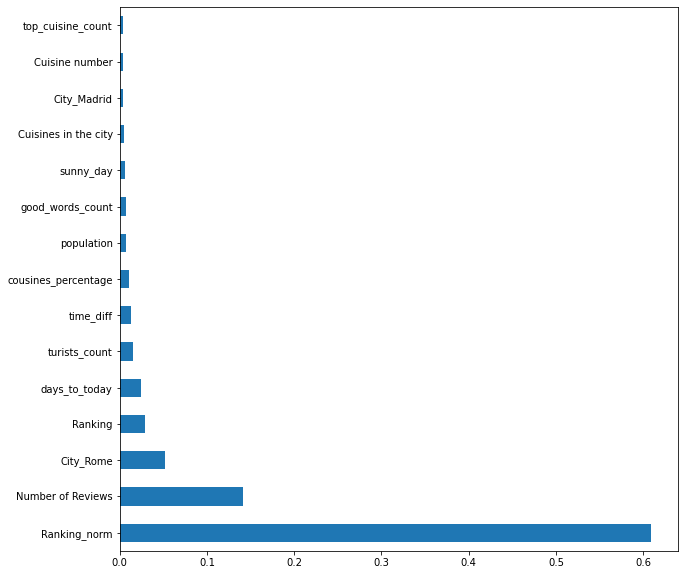

In [56]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [57]:
test_data.sample(20)

,Ranking,Number of Reviews,Rating,native_cuisine,Cuisine number,Cuisines in the city,cousines_percentage,top_cuisine_count,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Azerbaijani,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Burmese,Cafe,Cajun & Creole,Cambodian,Canadian,Caribbean,Caucasian,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ecuadorean,Egyptian,Ethiopian,European,Fast Food,Filipino,French,Fujian,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,Grill,Halal,Hawaiian,Healthy,Hungarian,Indian,Indonesian,International,Irish,Israeli,Italian,Jamaican,Japanese,Korean,Kosher,Latin,Latvian,Lebanese,Malaysian,Mediterranean,Mexican,Middle Eastern,Minority Chinese,Mongolian,Moroccan,Native American,Nepali,New Zealand,Norwegian,Pakistani,Persian,Peruvian,Pizza,Polish,Polynesian,Portuguese,Pub,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Seafood,Singaporean,Slovenian,Soups,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,no cuisine,Number of Reviews_isNAN,good_words_count,negative_words_count,time_diff,days_to_today,$,$$ - $$$,$$$$,unknown Price Range,Ranking_norm,capital_mark,turists_count,population,sunny_day,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
3347,11312.0,12.0,0.0,0,1.0,110,0.009091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,806.0,2920.0,0,1,0,0,0.191102,1,19.23,9.30,1410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7426,664.0,31.0,0.0,0,3.0,63,0.047619,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,14.0,1500.0,0,0,0,1,-0.121196,1,5.73,3.15,2771,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9166,2599.0,77.0,0.0,1,1.0,93,0.010753,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32124.0,1479.0,0,1,0,0,-0.203169,1,1.00,6.62,2769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2006,277.0,130.0,0.0,0,2.0,73,0.027397,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,47.0,1290.0,0,0,0,1,-0.385329,0,0.00,1.72,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4404,3092.0,43.0,0.0,0,3.0,89,0.033708,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78.0,1392.0,0,1,0,0,0.401024,1,6.41,1.93,1930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
486,2555.0,8.0,0.0,1,1.0,83,0.012048,1,0,0,0,0,0,0,0,0,0,0,

In [58]:
test_data = test_data.drop(['Rating'], axis=1)

In [59]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [60]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [61]:
predict_submission

array([3.13 , 4.175, 4.35 , ..., 3.055, 4.495, 4.345])

In [62]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.130
1,id_1,4.175
2,id_2,4.350
3,id_3,4.390
4,id_4,4.470
5,id_5,4.410
6,id_6,1.535
7,id_7,2.805
8,id_8,4.170
9,id_9,4.755


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
